# Глава 1. Полносвязные нейронные сети

Начнём с самой простой конфигурации — одного нейрона с одним входом и одним выходом, без активации. 
Далее будем маленькими итерациями усложнять конфигурацию сети и попробуем выжать из каждой из них разумный максимум. 

Это позволит подёргать сети за ниточки и наработать практическую интуицию в построении архитектур нейросетей

Нейросеть является ничем иным, как подходом к приближению многомерной функции. Для лучшего понимания будем приближать функцию на плоскости.

Для демонстрации конфигураций и результатов воспользуемся популярным фреймворком **Keras**

## Глоссарий 

### 1.1 Тренировочный сет

**Тренировочный сет (batch)** — это последовательность данных, которыми оперирует нейронная сеть.

### 1.2 Итерация

Это своеобразный счетчик, который увеличивается каждый раз, когда нейронная сеть проходит один тренировочный сет. Другими словами, это общее количество тренировочных сетов пройденных нейронной сетью.

### 1.3 Эпоха

При инициализации нейронной сети эта величина устанавливается в 0 и имеет потолок, задаваемый вручную. Чем больше эпоха, тем лучше натренирована сеть и соответственно, ее результат. Эпоха увеличивается каждый раз, когда мы проходим весь набор тренировочных сетов

Важно не путать итерацию с эпохой и понимать последовательность их инкремента. Сначала n
раз увеличивается итерация, а потом уже эпоха и никак не наоборот. Другими словами, нельзя сначала тренировать нейросеть только на одном сете, потом на другом и тд. Нужно тренировать каждый сет один раз за эпоху. 

## 1. Один нейрон

Самой простой из возможных конфигураций нейросетей является один нейрон с одним входом и одним выходом без активации (или можно сказать с линейной активацией f(x) = x):

![title](img/ann8.png)

Несмотря на свою простоту эта архитектура уже позволяет делать **линейную регрессию**, т.е. приближать функцию прямой линией (часто с минимизацией среднеквадратического отклонения). 

Пример очень важный, поэтому предлагаю разобрать его максимально подробно.

In [134]:
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [139]:
# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# задаём линейную функцию, которую попробуем приблизить нашей нейронной сетью
def f1(x):    
    return 2 * x + 5

def f2(x):    
    return 2 * np.sin(x) + 5

f = np.vectorize(f2)

# вычисляем вектор значений функции
y = f(x)

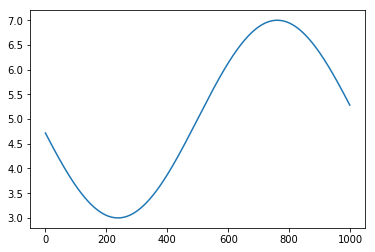

In [140]:
plt.plot(y)

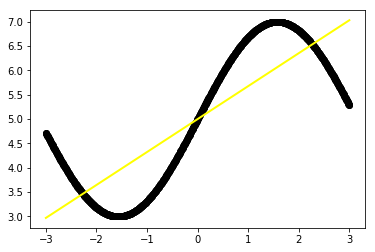

[array([[0.6765121]], dtype=float32), array([4.9997253], dtype=float32)]


In [141]:
# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense

def baseline_model():
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='sgd') # обучаем НС с помощью градиент. спуска
    return model

# тренируем сеть
model = baseline_model()
model.fit(x, y, nb_epoch=100, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='yellow', linewidth=2, antialiased=True)
plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

Результат ожидаемый. Давайте посмотрим на веса нашей модели после обучения. Первое число — это вес w, второе — смещение b. Чтобы убедиться в этом, давайте нарисуем прямую f(x) = w * x + b:

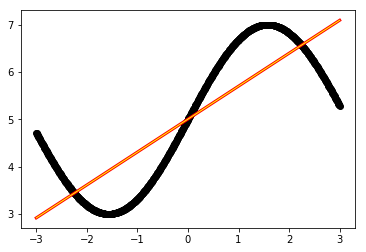

In [16]:
def line(x):
    w = model.layers[0].get_weights()[0][0][0]
    b = model.layers[0].get_weights()[1][0]
    
    return w * x + b

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='red', linewidth=3, antialiased=True)
plt.plot(x, line(x), color='yellow', linewidth=1, antialiased=True)
plt.show()

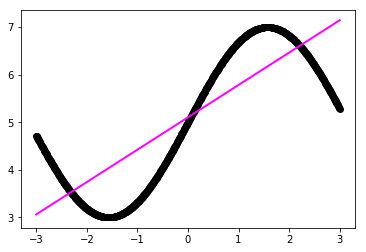

[array([[ 0.44484654, -0.5897409 ,  0.23022579,  0.10470726,  0.31294233]],
      dtype=float32), array([ 0.7855936 , -0.30388892,  0.9673107 ,  1.1457826 , -0.7351953 ],
      dtype=float32)]
[array([[ 0.8466985],
       [-0.3149031],
       [ 1.0521493],
       [ 1.2513463],
       [-0.8144199]], dtype=float32), array([1.2902434], dtype=float32)]


In [142]:
# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense

def baseline_model():
    model = Sequential()
    model.add(Dense(5, input_dim=1, activation='linear'))
    model.add(Dense(1, input_dim=5, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    return model

# тренируем сеть
model = baseline_model()
model.fit(x, y, nb_epoch=100, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)
plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

## 2. Простая нейронная сеть 

С приближением прямой всё ясно. Но это и классическая линейная регрессия неплохо делала. 

Как же захватить нейросетью нелинейность функции?

Попробуем добавить больше нейронов. Например, пять. На выходе ожидается одно значение для этого придётся добавить ещё один слой к сети, который просто будет суммировать все выходные значения с каждого из пяти нейронов:

![title](img/ann9.png)

/home/i347922/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


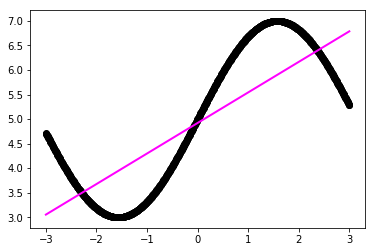

[array([[ 0.4685003 ,  0.1493026 ,  0.3490541 , -0.29276878, -0.48136076]],
      dtype=float32), array([ 1.5404751 , -0.25929928,  0.50087404, -0.01364034,  0.7970924 ],
      dtype=float32)]
[array([[ 1.7205735 ],
       [-0.25196984],
       [ 0.59188664],
       [-0.06285289],
       [ 0.77087164]], dtype=float32), array([1.2932193], dtype=float32)]


In [19]:
# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense

def baseline_model():
    model = Sequential()
    model.add(Dense(5, input_dim=1, activation='linear'))
    model.add(Dense(1, input_dim=5, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    return model

# тренируем сеть
model = baseline_model()
model.fit(x, y, nb_epoch=100, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)
plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

Ничего не вышло. 

Всё та же прямая, хотя матрица весов немного разрослась.

Всё дело в том, что архитектура нашей сети сводится к линейной комбинации линейных функций:

f(x) = w1' * (w1 * x + b1) +… + w5' (w5 * x + b5) + b

Т.е. опять же является линейной функцией. Чтобы сделать поведение нашей сети более интересным, добавим нейронам внутреннего слоя функцию активации ReLU (выпрямитель, f(x) = max(0, x)), которая позволяет сети ломать прямую на сегменты:

In [144]:
def baseline_model():
    model = Sequential()
    model.add(Dense(5, input_dim=1, activation='relu'))
    model.add(Dense(1, input_dim=5, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    return model

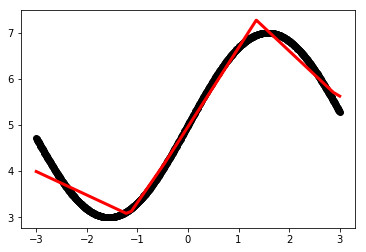

[array([[ 0.7838468, -0.3487135, -0.3308979,  1.2822303,  0.8461781]],
      dtype=float32), array([ 0.95816195, -0.17474326,  0.9487256 , -1.7318258 ,  0.9482947 ],
      dtype=float32)]
[array([[ 1.1935081],
       [ 0.3783707],
       [ 1.14345  ],
       [-2.1372702],
       [ 1.3629185]], dtype=float32), array([1.442702], dtype=float32)]


In [145]:
# тренируем сеть
model = baseline_model()
model.fit(x, y, nb_epoch=100, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='red', linewidth=3, antialiased=True)
plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

Максимальное количество сегментов совпадает с количеством нейронов на внутреннем слое. Добавив больше нейронов можно получить более точное приближение:

In [147]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1, input_dim=5, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    return model

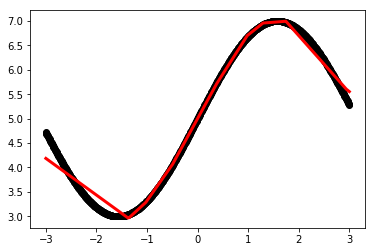

[array([[ 0.6976509 , -0.30720404,  0.6477926 , -0.03656623,  0.66263866,
        -0.6497016 ,  0.7776264 ,  0.6391618 ,  0.76058286,  0.6750081 ]],
      dtype=float32), array([ 0.9473639 ,  0.90030235,  0.66450703, -0.11077289,  0.9119943 ,
       -0.3253291 , -1.3580728 , -0.23133416, -0.746267  , -0.87191045],
      dtype=float32)]
[array([[ 1.272923  ],
       [ 1.0558676 ],
       [ 0.8060285 ],
       [-0.33952346],
       [ 1.2216651 ],
       [ 0.6558188 ],
       [-1.6050555 ],
       [-0.4168835 ],
       [-1.0508647 ],
       [-1.1086481 ]], dtype=float32), array([1.1978261], dtype=float32)]


In [148]:
# тренируем сеть
model = baseline_model()
model.fit(x, y, nb_epoch=100, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='red', linewidth=3, antialiased=True)
plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

Дайте больше точности!

Уже лучше, но огрехи видны на глаз — на изгибах, где исходная функция наименее похожа на прямую линию, приближение отстаёт.

В качестве стратегии оптимизации мы взяли довольно популярный метод — **SGD** (стохастический градиентный спуск). На практике часто используется его улучшенная версия с инерцией (SGDm, m — momentum). Это позволяет более плавно поворачивать на резких изгибах и приближение становится лучше на глаз:

In [150]:
# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

def baseline_model():
    model = Sequential()
    model.add(Dense(100, input_dim=1, activation='relu'))
    model.add(Dense(1, input_dim=100, activation='linear'))
    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

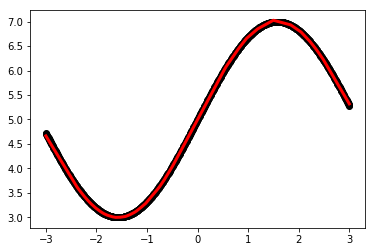

In [151]:
# тренируем сеть
model = baseline_model()
model.fit(x, y, nb_epoch=100, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='red', linewidth=3, antialiased=True)
plt.show()

## 3. Усложняем функцию

Синус — довольно удачная функция для оптимизации. Главным образом потому, что у него нет широких плато — т.е. областей, где функция изменяется очень медленно. К тому же сама функция изменяется довольно равномерно. Чтобы проверить нашу конфигурацию на прочность, возьмём функцию посложнее:

In [152]:
def f(x):
    return x * np.sin(x * 2 * np.pi) if x < 0 else -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

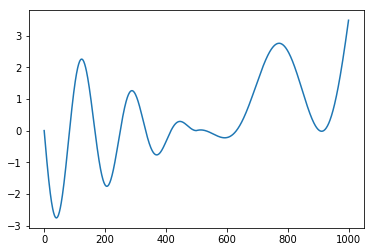

In [153]:
f = np.vectorize(f)

# вычисляем вектор значений функции
y = f(x)

plt.plot(y)

In [154]:
def baseline_model():
    model = Sequential()
    model.add(Dense(100, input_dim=1, activation='relu'))
    model.add(Dense(1, input_dim=100, activation='linear'))
    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

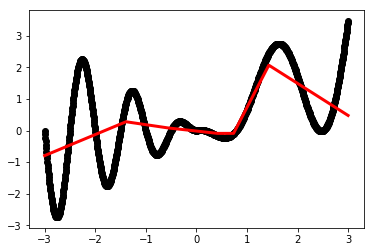

In [155]:
# тренируем сеть
model = baseline_model()
model.fit(x, y, nb_epoch=100, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='red', linewidth=3, antialiased=True)
plt.show()

## 3.1 Усложняем нейлинейность

Давайте попробуем заменить служивший нам в предыдущих примерах верой и правдой ReLU (выпрямитель) на более нелинейный гиперболический тангенс:

![title](img/ann11.png)

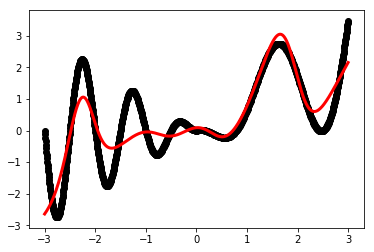

In [156]:
def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=1, activation='tanh'))
    model.add(Dense(1, input_dim=20, activation='linear'))
    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

# тренируем сеть
model = baseline_model()
model.fit(x, y, nb_epoch=200, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='red', linewidth=3, antialiased=True)
plt.show()

## 3.2 Инициализация весов

Приближение стало лучше на сгибах, но часть функции наша сеть не увидела.

Давайте попробуем поиграться с ещё одним параметром — начальным распределением весов. 

Используем популярное на практике значение 'glorot_normal' (по имени исследователя Xavier Glorot, в некоторых фреймворках называется XAVIER):

* Очевидно, что этот вопрос очень важен: установка всех весов в 0 будет серьезным препятствием для обучения, так как ни один из весов изначально не будет активен. 

* От правильной инициализации модели может зависеть, достигнет она высочайшей производительности или вообще не будет сходиться. 

* Даже если задача не предполагает такой крайности, удачно выбранный способ инициализации весов может значительно влиять на способность модели к обучению, так как он предустанавливает параметры модели с учетом функции потерь.

**Метод инициализации Завьера (Xavier)** (иногда — метод Glorot’а). 

Основная идея этого метода — упростить прохождение сигнала через слой во время как прямого, так и обратного распространения ошибки для линейной функции активации (этот метод также хорошо работает для сигмоидной функции, так как участок, где она ненасыщена, также имеет линейный характер).

При вычислении весов этот метод опирается на вероятностное распределение (равномерное или нормальное) с дисперсией $$Var(W)= {2 \over n_{in} + n_{out}}$$, где n количества нейронов в предыдущем и последующем слоях соответственно.

**Метод инициализации Ге (He)** — это вариация метода Завьера, больше подходящая функции активации ReLU, компенсирующая тот факт, что эта функция возвращает нуль для половины области определения. А именно, в этом случае $$\mathrm{Var}(W) = {2 \over{n_{in}}}$$

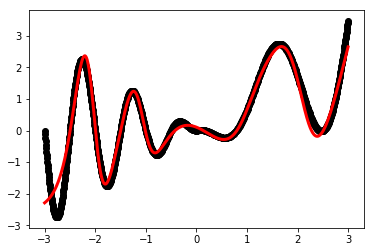

In [157]:
def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=1, activation='tanh', init='glorot_normal'))
    model.add(Dense(1, input_dim=20, activation='linear', init='glorot_normal'))
    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

# тренируем сеть
model = baseline_model()
model.fit(x, y, nb_epoch=400, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='red', linewidth=3, antialiased=True)
plt.show()

Уже лучше. Но использование 'he_normal' (по имени исследователя Kaiming He) даёт ещё более приятный результат:

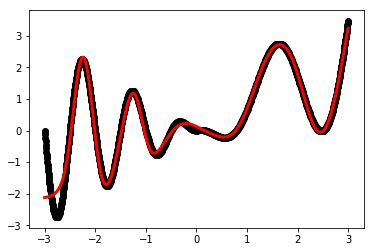

In [158]:
def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=1, activation='tanh', init='he_normal'))
    model.add(Dense(1, input_dim=20, activation='linear', init='he_normal'))
    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

# тренируем сеть
model = baseline_model()
model.fit(x, y, nb_epoch=400, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='red', linewidth=3, antialiased=True)
plt.show()

## 3.3 Как нейросеть воспроизводит функцию?

Давайте сделаем небольшую паузу и разберёмся, каким образом работает наша текущая конфигурация. Сеть представляет из себя линейную комбинацию гиперболических тангенсов:

f(x) = w1' * tanh(w1 * x + b1) +… + w5' * tanh(w5 * x + b5) + b

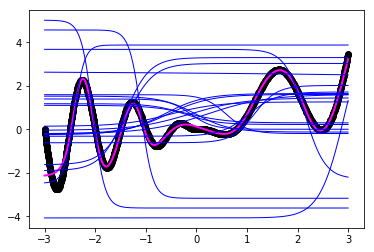

In [160]:
# с помощью матрицы весом моделируем выход каждого отдельного нейрона перед суммацией
def tanh(x, i):
    w0 = model.layers[0].get_weights()
    w1 = model.layers[1].get_weights()
    
    return w1[0][i][0] * np.tanh(w0[0][0][i] * x + w0[1][i]) + w1[1][0]

# рисуем функцию и приближение
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='red', linewidth=2, antialiased=True)

# рисуем разложение
for i in range(0, 20, 1):
    plt.plot(x, tanh(x, i), color='blue',
         linewidth=1)

plt.show()

На иллюстрации хорошо видно, что каждый гиперболический тангенс захватил небольшую зону ответственности и работает над приближением функции в своём небольшом диапазоне. За пределами своей области тангенс сваливается в ноль или единицу и просто даёт смещение по оси ординат.

## 4. Двухслойная нейронная сеть

Идём в глубину

До сих пор наша конфигурация не являлась примером глубокой нейронной сети, т.к. в ней был всего один внутренний слой. Добавим ещё один:

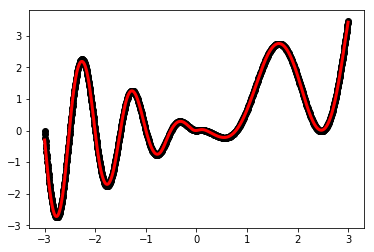

In [161]:
def baseline_model():
    model = Sequential()
    model.add(Dense(50, input_dim=1, activation='tanh', init='he_normal'))
    model.add(Dense(50, input_dim=50, activation='tanh', init='he_normal'))
    model.add(Dense(1, input_dim=50, activation='linear', init='he_normal'))
    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

# тренируем сеть
model = baseline_model()
model.fit(x, y, nb_epoch=400, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='red', linewidth=3, antialiased=True)
plt.show()

Слепое добавление слоёв не даёт автоматического улучшения, что называется из коробки. 

Для большинства практических применений двух внутренних слоёв вполне достаточно, при этом вам не придётся разбираться со спецэффектами слишком глубоких сетей, как например проблема исчезающего градиента. 

Если вы всё-таки решили идти в глубину, будьте готовы много экспериментировать с обучением сети.

Таким образом, нейронные сети — это мощный, но при этом нетривиальный прикладной инструмент. Лучший способ научиться строить рабочие нейросетевые конфигурации — начинать с более простых моделей и много экспериментировать с архитектурами и гиперпараметрами

### Упражнение 1.
* Зависимость от числа нейронов (1,5,20,100)
* Зависимость от числа эпох в обучении (20,50,100,200,400,800,4000)

### Упражнение 2. 

* Построить нейронную сеть для моделирования цен на недвижимость
* **Датасет Бостон**
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/ 
Набор данных описывает 13 числовых признаков домов в пригороде Бостона. Описывает задачу регрессии цены домов в этих пригородах в тысячах долларов. Входные атрибуты включают в себя такие факторы, как площадь, уровень преступности, уровень загрязнения и др.
* Взять за основу конфигурацию нейронной сети (5,1) 
* Подбирая число нейронной в слоях, число слоев (не более двух), функцию активации, способ инициализации весов, число эпох, использование нормализации данных, скорость обучения и др.
* Использовать train_test_split с test_size=20%, для создания обучающей и проверочной выборки
* Приблизиться к бейзлайну MSE = 20000 (4500 $, если извлечь корень) на проверочной выборке
* Срок 22 февраля 24:00